<a href="https://colab.research.google.com/github/vanessaaleung/hiring-amid-covid/blob/master/COVID19_Challenge.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# COVID-19 Challenge:  Who's still hiring?

**Group Member: Vannesa Leung/Minke Wang/Yuping Qi/Stella Zhang**



## Install & Import Packages

In [1]:
# !pip install -q kaggle
# ! apt-get install default-jre
# !java -version
! pip install h2o
# data preprocessing packages
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
#machine learning package
import h2o
#file handling
import os
from google.colab import files

     |████████████████████████████████| 129.5MB 88kB/s 
  Created wheel for h2o: filename=h2o-3.30.0.1-py2.py3-none-any.whl size=129557718 sha256=c11af33ac6580a7fdcae7f4d076271019e5ae642a406f9db1aad75d0f927fd47
  Stored in directory: /root/.cache/pip/wheels/db/42/63/d118d7218432054da842f5d10bd4f99e978bde0931164e6c7a
Successfully built h2o


/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


## Import Dataset from Multiple Sources

In [0]:
# import the candor dataset of company hiring status
data=pd.read_csv("https://raw.githubusercontent.com/vanessaaleung/rawdata/master/updated_apr_10.csv")

In [3]:
# import crunchbase company dataset of funding status
os.environ['KAGGLE_USERNAME'] = "minkewang" # username
os.environ['KAGGLE_KEY'] = "4ac64942fb1cdf679a628708e3cae405" # key
!kaggle datasets download -d arindam235/startup-investments-crunchbase # api copied from kaggle
cbdata = pd.read_csv('startup-investments-crunchbase.zip', compression='zip', header=0, sep=',', quotechar='"',thousands=r',',encoding= 'unicode_escape')

  0% 0.00/2.67M [00:00<?, ?B/s]
100% 2.67M/2.67M [00:00<00:00, 90.3MB/s]


## Data Preprocessing

In [0]:
# clear unncessary strings within the dataset
cbdata['name']=cbdata['name'].str.strip()

In [0]:
# merge data from multiple sources
merge=pd.merge(cbdata,data,how='inner',left_on="name",right_on='Company name')

In [6]:
merge.sample(5)

,permalink,name,homepage_url,category_list,market,funding_total_usd,status,country_code,state_code,region,city,funding_rounds,founded_at,founded_month,founded_quarter,founded_year,first_funding_at,last_funding_at,seed,venture,equity_crowdfunding,undisclosed,convertible_note,debt_financing,angel,grant,private_equity,post_ipo_equity,post_ipo_debt,secondary_market,product_crowdfunding,round_A,round_B,round_C,round_D,round_E,round_F,round_G,round_H,Company name,Notes,Status,Last modified,Where to apply,Industry,Location,Founded Date,Founders,Funding Status,Last Funding Type,Number of Employees,Revenue Range,Hug Tags,Ipo Status,Company Type,Number of Acquisitions,Total Funding,Headquarters Location,Headquarters Regions,Number of Investments,Estimated Revenue Range,IPO Status,Total Funding Amount,Hub Tags
722,/organization/trendyol,Trendyol,http://www.trendyol.com,|Lifestyle|Privacy|Nightclubs|Shopping|Fashion...,Shopping,"3,69,40,188",operating,TUR,NaN,Istanbul,Istanbul,3.0,2009-11-01,2009-11,2009-Q4,2009.0,2010-07-23,2011-07-22,0.0,36940188.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2860748.0,9079440.0,25000000.0,0.0,0.0,0.0,0.0,0.0,Trendyol,All kinds of roles\n,Hiring,2020-03-31T23:07:00.000Z,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
200,/organization/dataart,DataArt,http://www.dataart.com,|Software|,Software,"40,00,000",operating,USA,NY,New York City,New York,1.0,1997-01-01,1997-01,1997-Q1,1997.0,2008-05-28,2008-05-28,0.0,4000000.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,DataArt,\n,"Hiring,Hiring freeze",2020-04-03T21:02:57.000Z,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
679,/organization/tailwind,Tailwind,http://tailwindapp.com,|Social Media|Social Media Marketing|Social Bo...,Social Media Marketing,"10,00,000",operating,USA,OK,Oklahoma City,Oklahoma City,1.0,2012-02-01,2012-02,2012-Q1,2012.0,2013-11-06,2013-11-06,1000000.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Tailwind,Continue to hire across the company - actively...,Hiring,2020-04-01T18:00:40.000Z,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
91,/organization/bmc-software,BMC Software,http://www.bmc.com,|Software|,Software,"75,00,00,000",operating,USA,TX,Houston,Houston,1.0,1980-09-19,1980-09,1980-Q3,1980.0,2014-04-08,2014-04-08,0.0,0.0,0.0,0.0,0.0,750000000.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,BMC Software,\n,Hiring,2020-04-10T15:29:22.000Z,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
485,/organization/npr,NPR,http://www.npr.org,|Music|Nonprofits|,Music,"1,70,00,000",operating,USA,DC,"Washington, D.C.",Washington,1.0,1970-01-01,1970-01,1970-Q1,1970.0,2013-12-15,2013-12-15,0.0,0.0,0.0,0.0,0.0,0.0,0.0,17000000.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NPR,Summer 2020 Internships cancelled\n,Hiring,2020-04-07T14:22:52.000Z,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [0]:
# convert string data to numerical 
merge[' funding_total_usd ']=merge[' funding_total_usd '].str.replace(',', '').str.replace('-', '0').str.replace(' ', '').astype(float)

In [0]:
# convert hiring status, hiring=1, hiring freeze/layoffs=0; y variable
merge['HiringStatus']=(merge['Status'].isin(['Hiring'])).astype(int)

In [0]:
##calculating new metric: company age
merge['company_age']=2020-merge['founded_year']

In [0]:
# drop unnecessary columns
drop_col=['permalink','homepage_url', 'category_list','country_code', 'state_code', 'region',
       'city','founded_at', 'founded_month',
       'founded_quarter', 'founded_year', 'first_funding_at',
       'last_funding_at','equity_crowdfunding','Company name', 'Notes', 'Status', 'Last modified', 'Where to apply',
       'Industry', 'Location', 'Founded Date', 'Founders', 'Funding Status',
       'Last Funding Type', 'Number of Employees', 'Revenue Range', 'Hug Tags',
       'Ipo Status', 'Company Type', 'Number of Acquisitions', 'Total Funding',
       'Headquarters Location', 'Headquarters Regions',
       'Number of Investments', 'Estimated Revenue Range', 'IPO Status',
       'Total Funding Amount', 'Hub Tags']
merge=merge.drop(columns=drop_col)

In [78]:
merge.head()

,name,market,funding_total_usd,status,funding_rounds,seed,venture,undisclosed,convertible_note,debt_financing,angel,grant,private_equity,post_ipo_equity,post_ipo_debt,secondary_market,product_crowdfunding,round_A,round_B,round_C,round_D,round_E,round_F,round_G,round_H,HiringStatus,company_age
0,1010data,Software,35000000.0,operating,1.0,0.0,35000000.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,20.0
1,15Five,Software,3400000.0,operating,3.0,2200000.0,0.0,0.0,0.0,0.0,1200000.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,9.0
2,1stdibs,E-Commerce,117000000.0,operating,4.0,0.0,57000000.0,60000000.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,15000000.0,0.0,0.0,0.0,0.0,0.0,0,19.0
3,23andMe,Biotechnology,111949900.0,operating,6.0,0.0,110549900.0,0.0,0.0,0.0,0.0,1400000.0,0.0,0.0,0.0,0.0,0.0,9000000.0,12600000.0,31000000.0,57949900.0,0.0,0.0,0.0,0.0,0,14.0
4,2U,Software,95875000.0,operating,6.0,2275000.0,93600000.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,10000000.0,20000000.0,32500000.0,31100000.0,0.0,0.0,0.0,0.0,0,12.0


In [12]:
merge.HiringStatus.value_counts()

0    459
1    375
Name: HiringStatus, dtype: int64

In [0]:
# # connect to drive for output
# from google.colab import (drive, files)
# drive.mount('/content/gdrive', force_remount=True)
# path = "/content/gdrive"
# os.chdir(path)

In [0]:
#merge.to_csv('My Drive/Colab Notebooks/COVID19.csv')

In [15]:
#check companies with recent large scale layoffs
merge[merge['name']=='Yelp']

,name,market,funding_total_usd,status,funding_rounds,seed,venture,undisclosed,convertible_note,debt_financing,angel,grant,private_equity,post_ipo_equity,post_ipo_debt,secondary_market,product_crowdfunding,round_A,round_B,round_C,round_D,round_E,round_F,round_G,round_H,HiringStatus,company_age
800,Yelp,Customer Service,56000000.0,operating,5.0,0.0,56000000.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1000000.0,5000000.0,10000000.0,15000000.0,25000000.0,0.0,0.0,0.0,0,16.0


In [16]:
merge[merge['name']=='Thumbtack']

,name,market,funding_total_usd,status,funding_rounds,seed,venture,undisclosed,convertible_note,debt_financing,angel,grant,private_equity,post_ipo_equity,post_ipo_debt,secondary_market,product_crowdfunding,round_A,round_B,round_C,round_D,round_E,round_F,round_G,round_H,HiringStatus,company_age
709,Thumbtack,Curated Web,148200000.0,operating,5.0,0.0,147000000.0,0.0,0.0,0.0,1200000.0,0.0,0.0,0.0,0.0,0.0,0.0,4500000.0,12500000.0,30000000.0,100000000.0,0.0,0.0,0.0,0.0,0,12.0


In [0]:
#merge=merge.drop(columns=['name','status'])

## Exploratory Data Analysis

In [0]:
df=merge.copy()

In [0]:
round_avg = pd.DataFrame(df.groupby(by=["HiringStatus"])[["round_A", "round_B", "round_C", "round_D"]].mean().reset_index())
round_avg = pd.melt(round_avg, id_vars=['HiringStatus'], value_vars=["round_A", "round_B", "round_C", "round_D"], value_name="avg funding", var_name="round")

Text(0.5, 1.0, 'Average funding and rounds by hiring status')

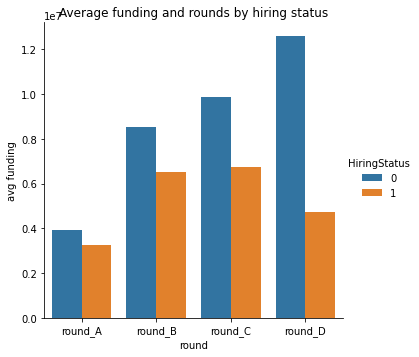

In [54]:
## hiring status and company funding rounds
sns.catplot(x="round", 
            y="avg funding", 
            hue="HiringStatus", 
            kind="bar", 
            data=round_avg,
            );
plt.title('Average funding and rounds by hiring status')

In [44]:
top_indsutries=pd.DataFrame(df[' market '].value_counts()>10)[:15].index
df[df[' market '].isin(top_indsutries)]

,name,market,funding_total_usd,status,funding_rounds,seed,venture,undisclosed,convertible_note,debt_financing,angel,grant,private_equity,post_ipo_equity,post_ipo_debt,secondary_market,product_crowdfunding,round_A,round_B,round_C,round_D,round_E,round_F,round_G,round_H,HiringStatus,company_age
0,1010data,Software,35000000.0,operating,1.0,0.0,35000000.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,20.0
1,15Five,Software,3400000.0,operating,3.0,2200000.0,0.0,0.0,0.0,0.0,1200000.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,9.0
2,1stdibs,E-Commerce,117000000.0,operating,4.0,0.0,57000000.0,60000000.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,15000000.0,0.0,0.0,0.0,0.0,0.0,0,19.0
3,23andMe,Biotechnology,111949900.0,operating,6.0,0.0,110549900.0,0.0,0.0,0.0,0.0,1400000.0,0.0,0.0,0.0,0.0,0.0,9000000.0,12600000.0,31000000.0,57949900.0,0.0,0.0,0.0,0.0,0,14.0
4,2U,Software,95875000.0,operating,6.0,2275000.0,93600000.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,10000000.0,20000000.0,32500000.0,31100000.0,0.0,0.0,0.0,0.0,0,12.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
823,Zola,E-Commerce,5849999.0,operating,2.0,0.0,5849999.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5849999.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,7.0
824,Zones,E-Commerce,700000.0,operating,1.0,0.0,0.0,0.0,0.0,700000.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,32.0
828,Zopa,Finance,56628771.0,operating,6.0,0.0,33900000.0,22728771.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1000000.0,20000000.0,12900000.0,0.0,0.0,0.0,0.0,0.0,1,15.0
832,Zymergen,Biotechnology,0.0,operating,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,7.0


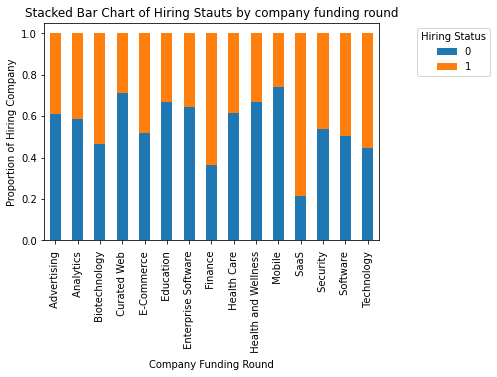

In [45]:
# explore the industry pattern towards hiring status
table=pd.crosstab(df[df[' market '].isin(top_indsutries)][' market '],df[df[' market '].isin(top_indsutries)].HiringStatus)
table.div(table.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True)
plt.title('Stacked Bar Chart of Hiring Stauts by company industry')
plt.xlabel('Company indsury')
plt.ylabel('Proportion of Hiring Company')
plt.legend(title='Hiring Status',bbox_to_anchor=(1.1, 1))

/usr/local/lib/python3.6/dist-packages/numpy/lib/histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/usr/local/lib/python3.6/dist-packages/numpy/lib/histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


(array([389., 210.,  81.,  30.,   9.,  12.,   6.,   3.,   4.,   4.,   0.,
          2.,   0.,   0.,   0.,   0.,   0.,   1.,   0.,   2.]),
 array([  6.  ,  11.55,  17.1 ,  22.65,  28.2 ,  33.75,  39.3 ,  44.85,
         50.4 ,  55.95,  61.5 ,  67.05,  72.6 ,  78.15,  83.7 ,  89.25,
         94.8 , 100.35, 105.9 , 111.45, 117.  ]),
 <a list of 20 Patch objects>)

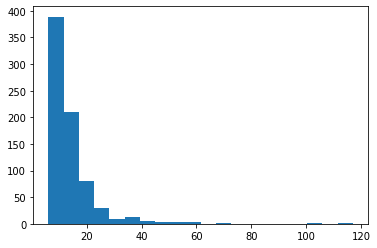

In [70]:
plt.hist(merge['company_age'],bins=20)

Text(0.5, 1.0, 'funding rounds and hiring status')

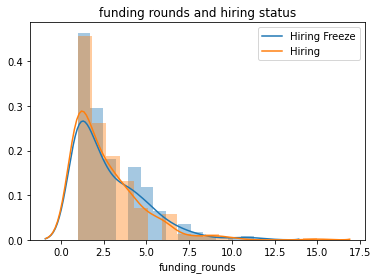

In [71]:
# explore the funding rounds 
bins = [0, 5, 10, 15]
funding_rounds_count = pd.DataFrame(df.groupby(['HiringStatus', pd.cut(df.funding_rounds, bins)]).size()).reset_index().rename(columns={0: "count"})
funding_rounds_count["percentage"] = funding_rounds_count["count"] 
for idx, row in funding_rounds_count.iterrows():
  hiring_status = row["HiringStatus"]
  sums = funding_rounds_count[funding_rounds_count["HiringStatus"] == hiring_status]["count"].sum()
  funding_rounds_count.loc[idx, "percentage"]  = row["count"] / sums
sns.distplot(df[df["HiringStatus"] == 0]["funding_rounds"], kde_kws={"label": "Hiring Freeze"})
sns.distplot(df[df["HiringStatus"] == 1]["funding_rounds"], kde_kws={"label": "Hiring"})
plt.title('Funding rounds and hiring status')

Text(0.5, 1.0, 'Company age and hiring status')

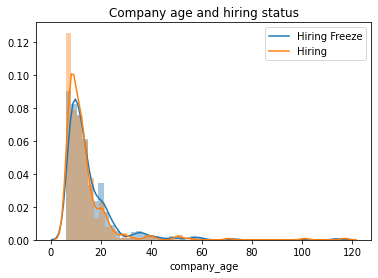

In [72]:
#company establish years vs hiring status
bins = [0, 5, 10, 15]
age = pd.DataFrame(df.groupby(['HiringStatus', pd.cut(df['company_age'], bins)]).size()).reset_index().rename(columns={0: "count"})
age["percentage"] = age["count"] 
for idx, row in age.iterrows():
  hiring_status = row["HiringStatus"]
  sums = age[age["HiringStatus"] == hiring_status]["count"].sum()
  age.loc[idx, "percentage"]  = row["count"] / sums
sns.distplot(df[df["HiringStatus"] == 0]["company_age"], kde_kws={"label": "Hiring Freeze"})
sns.distplot(df[df["HiringStatus"] == 1]["company_age"], kde_kws={"label": "Hiring"})
plt.title('Company age and hiring status')

## H2O AutoML
H2O’s AutoML can be used for automating the machine learning workflow, which includes automatic training and tuning of many models within a user-specified time-limit.

In [56]:
##initialize environment
h2o.init()

Checking whether there is an H2O instance running at http://localhost:54321 ..... not found.
Attempting to start a local H2O server...
  Java Version: openjdk version "11.0.6" 2020-01-14; OpenJDK Runtime Environment (build 11.0.6+10-post-Ubuntu-1ubuntu118.04.1); OpenJDK 64-Bit Server VM (build 11.0.6+10-post-Ubuntu-1ubuntu118.04.1, mixed mode, sharing)
  Starting server from /usr/local/lib/python3.6/dist-packages/h2o/backend/bin/h2o.jar
  Ice root: /tmp/tmpzp6cmgaj
  JVM stdout: /tmp/tmpzp6cmgaj/h2o_unknownUser_started_from_python.out
  JVM stderr: /tmp/tmpzp6cmgaj/h2o_unknownUser_started_from_python.err
  Server is running at http://127.0.0.1:54321
Connecting to H2O server at http://127.0.0.1:54321 ... successful.


H2O_cluster_uptime:,02 secs
H2O_cluster_timezone:,Etc/UTC
H2O_data_parsing_timezone:,UTC
H2O_cluster_version:,3.30.0.1
H2O_cluster_version_age:,11 days
H2O_cluster_name:,H2O_from_python_unknownUser_dhmk5w
H2O_cluster_total_nodes:,1
H2O_cluster_free_memory:,3.180 Gb
H2O_cluster_total_cores:,2
H2O_cluster_allowed_cores:,2
H2O_cluster_status:,"accepting new members, healthy"


In [79]:
# convert data to H2O data frame
merge_h2o=h2o.H2OFrame(merge)

Parse progress: |█████████████████████████████████████████████████████████| 100%


In [80]:
merge_h2o.types

{' funding_total_usd ': 'int',
 ' market ': 'enum',
 'HiringStatus': 'int',
 'angel': 'int',
 'company_age': 'int',
 'convertible_note': 'int',
 'debt_financing': 'int',
 'funding_rounds': 'int',
 'grant': 'int',
 'name': 'string',
 'post_ipo_debt': 'int',
 'post_ipo_equity': 'int',
 'private_equity': 'int',
 'product_crowdfunding': 'int',
 'round_A': 'int',
 'round_B': 'int',
 'round_C': 'int',
 'round_D': 'int',
 'round_E': 'int',
 'round_F': 'int',
 'round_G': 'int',
 'round_H': 'int',
 'secondary_market': 'int',
 'seed': 'int',
 'status': 'enum',
 'undisclosed': 'int',
 'venture': 'int'}

In [0]:
#split train test dataset using h2o train split
train,test,valid = merge_h2o.split_frame(ratios=[.7, .15])

In [0]:
# define X and y variables 
y = 'HiringStatus'
x = train.columns
x.remove(y)
train[y] = train[y].asfactor()
test[y] = test[y].asfactor()

In [83]:
#auto machine learning package to predict results
from h2o.automl import H2OAutoML
aml = H2OAutoML(max_models=10, 
                balance_classes = True,
                max_runtime_secs=300, 
                seed = 1234,
                )
aml.train(x = x, y = y, training_frame = train)

AutoML progress: |████████████████████████████████████████████████████████| 100%


In [84]:
aml.leaderboard

model_id,auc,logloss,aucpr,mean_per_class_error,rmse,mse
GBM_4_AutoML_20200415_083036,0.543452,0.842174,0.495204,0.494654,0.541316,0.293023
GBM_2_AutoML_20200415_083036,0.531138,0.879555,0.494613,0.495926,0.55139,0.304031
GBM_5_AutoML_20200415_083036,0.527234,0.814816,0.475408,0.5,0.536464,0.287794
XGBoost_3_AutoML_20200415_083036,0.521696,0.793185,0.46881,0.5,0.534734,0.28594
GBM_3_AutoML_20200415_083036,0.515755,0.941277,0.479228,0.5,0.569341,0.32415
DRF_1_AutoML_20200415_083036,0.515176,0.820841,0.482865,0.5,0.541751,0.293494
StackedEnsemble_BestOfFamily_AutoML_20200415_083036,0.51137,0.691973,0.472515,0.5,0.499393,0.249393
GBM_1_AutoML_20200415_083036,0.507274,0.913711,0.468914,0.493381,0.566748,0.321203
StackedEnsemble_AllModels_AutoML_20200415_083036,0.503697,0.692856,0.464693,0.5,0.499834,0.249834
GLM_1_AutoML_20200415_083036,0.502266,0.690052,0.449594,0.496942,0.498474,0.248476


In [85]:
aml.leader

Model Details
H2OGradientBoostingEstimator :  Gradient Boosting Machine
Model Key:  GBM_4_AutoML_20200415_083036


Model Summary: 


,,number_of_trees,number_of_internal_trees,model_size_in_bytes,min_depth,max_depth,mean_depth,min_leaves,max_leaves,mean_leaves
0,,30.0,30.0,27453.0,8.0,10.0,9.9,19.0,42.0,34.3




ModelMetricsBinomial: gbm
** Reported on train data. **

MSE: 0.07792947766752131
RMSE: 0.2791585170965079
LogLoss: 0.2858035390720864
Mean Per-Class Error: 0.05483736447039189
AUC: 0.9851959966638867
AUCPR: 0.9844986275978437
Gini: 0.9703919933277734

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.4559483812604928: 


,,0,1,Error,Rate
0,0,301.0,26.0,0.0795,(26.0/327.0)
1,1,10.0,320.0,0.0303,(10.0/330.0)
2,Total,311.0,346.0,0.0548,(36.0/657.0)



Maximum Metrics: Maximum metrics at their respective thresholds


,metric,threshold,value,idx
0,max f1,0.455948,0.946746,209.0
1,max f2,0.450854,0.961654,212.0
2,max f0point5,0.513085,0.946276,193.0
3,max accuracy,0.484137,0.945205,202.0
4,max precision,0.952755,1.000000,0.0
5,max recall,0.334423,1.000000,253.0
6,max specificity,0.952755,1.000000,0.0
7,max absolute_mcc,0.455948,0.891443,209.0
8,max min_per_class_accuracy,0.497719,0.941896,196.0
9,max mean_per_class_accuracy,0.484137,0.945163,202.0



Gains/Lift Table: Avg response rate: 50.23 %, avg score: 47.90 %


,,group,cumulative_data_fraction,lower_threshold,lift,cumulative_lift,response_rate,score,cumulative_response_rate,cumulative_score,capture_rate,cumulative_capture_rate,gain,cumulative_gain
0,,1,0.010654,0.944993,1.990909,1.990909,1.000000,0.947232,1.000000,0.947232,0.021212,0.021212,99.090909,99.090909
1,,2,0.021309,0.942208,1.990909,1.990909,1.000000,0.943576,1.000000,0.945404,0.021212,0.042424,99.090909,99.090909
2,,3,0.030441,0.939458,1.990909,1.990909,1.000000,0.939947,1.000000,0.943767,0.018182,0.060606,99.090909,99.090909
3,,4,0.041096,0.936283,1.990909,1.990909,1.000000,0.938164,1.000000,0.942314,0.021212,0.081818,99.090909,99.090909
4,,5,0.050228,0.933980,1.990909,1.990909,1.000000,0.935123,1.000000,0.941007,0.018182,0.100000,99.090909,99.090909
5,,6,0.100457,0.921866,1.990909,1.990909,1.000000,0.928130,1.000000,0.934568,0.100000,0.200000,99.090909,99.090909
6,,7,0.152207,0.875365,1.990909,1.990909,1.000000,0.904000,1.000000,0.924175,0.103030,0.303030,99.090909,99.090909
7,,8,0.200913,0.815749,1.990909,1.990909,1.000000,0.847412,1.000000,0.905566,0.096970,0.400000,99.090909,99.090909
8,,9,0.299848,0.714447,1.929650,1.970697,0.969231,0.759843,0.989848,0.857485,0.190909,0.590909,92.965035,97.069682
9,,10,0.400304,0.613820,1.900413,1.953059,0.954545,0.662628,0.980989,0.808585,0.190909,0.781818,90.041322,95.305911




ModelMetricsBinomial: gbm
** Reported on cross-validation data. **

MSE: 0.29302304448417876
RMSE: 0.5413160301378288
LogLoss: 0.8421741159347108
Mean Per-Class Error: 0.4560452162516382
AUC: 0.5434523809523809
AUCPR: 0.49520374724833727
Gini: 0.08690476190476182

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.042358505038721087: 


,,0,1,Error,Rate
0,0,7.0,320.0,0.9786,(320.0/327.0)
1,1,3.0,277.0,0.0107,(3.0/280.0)
2,Total,10.0,597.0,0.5321,(323.0/607.0)



Maximum Metrics: Maximum metrics at their respective thresholds


,metric,threshold,value,idx
0,max f1,0.042359,0.631699,390.0
1,max f2,0.020824,0.810654,399.0
2,max f0point5,0.155116,0.528261,338.0
3,max accuracy,0.892048,0.551895,31.0
4,max precision,0.957026,1.000000,0.0
5,max recall,0.020824,1.000000,399.0
6,max specificity,0.957026,1.000000,0.0
7,max absolute_mcc,0.321955,0.094917,277.0
8,max min_per_class_accuracy,0.461337,0.525994,203.0
9,max mean_per_class_accuracy,0.321955,0.543955,277.0



Gains/Lift Table: Avg response rate: 46.13 %, avg score: 44.81 %


,,group,cumulative_data_fraction,lower_threshold,lift,cumulative_lift,response_rate,score,cumulative_response_rate,cumulative_score,capture_rate,cumulative_capture_rate,gain,cumulative_gain
0,,1,0.011532,0.946519,1.238776,1.238776,0.571429,0.952055,0.571429,0.952055,0.014286,0.014286,23.877551,23.877551
1,,2,0.021417,0.935583,0.722619,1.000549,0.333333,0.941452,0.461538,0.947161,0.007143,0.021429,-27.738095,0.054945
2,,3,0.031301,0.927535,0.722619,0.912782,0.333333,0.930938,0.421053,0.942038,0.007143,0.028571,-27.738095,-8.721805
3,,4,0.041186,0.924009,1.806548,1.127286,0.833333,0.925813,0.520000,0.938144,0.017857,0.046429,80.654762,12.728571
4,,5,0.051071,0.914780,1.445238,1.188825,0.666667,0.919317,0.548387,0.934500,0.014286,0.060714,44.523810,18.882488
5,,6,0.100494,0.821247,1.083929,1.137237,0.500000,0.874594,0.524590,0.905038,0.053571,0.114286,8.392857,13.723653
6,,7,0.149918,0.726500,1.011667,1.095840,0.466667,0.765238,0.505495,0.858950,0.050000,0.164286,1.166667,9.583987
7,,8,0.200988,0.639610,0.979032,1.066159,0.451613,0.674613,0.491803,0.812110,0.050000,0.214286,-2.096774,6.615925
8,,9,0.299835,0.574515,1.120060,1.083929,0.516667,0.606274,0.500000,0.744252,0.110714,0.325000,12.005952,8.392857
9,,10,0.400329,0.520387,1.101698,1.088389,0.508197,0.548167,0.502058,0.695029,0.110714,0.435714,10.169789,8.838918




Cross-Validation Metrics Summary: 


,,mean,sd,cv_1_valid,cv_2_valid,cv_3_valid,cv_4_valid,cv_5_valid
0,accuracy,0.49581358,0.031209296,0.5409836,0.4918033,0.45454547,0.5041322,0.4876033
1,auc,0.5474711,0.06946262,0.6047078,0.44642374,0.54732394,0.52021855,0.6186813
2,aucpr,0.5190139,0.07236685,0.5711449,0.44788682,0.464421,0.49464008,0.6169765
3,err,0.50418645,0.031209296,0.45901638,0.5081967,0.54545456,0.49586776,0.5123967
4,err_count,61.2,3.6331804,56.0,62.0,66.0,60.0,62.0
5,f0point5,0.5322422,0.028972657,0.5544355,0.5319149,0.48638132,0.559633,0.52884614
6,f1,0.64289194,0.02647919,0.6626506,0.6395349,0.60240966,0.6703297,0.6395349
7,f2,0.81213635,0.017584646,0.8233533,0.8017493,0.79113925,0.8356164,0.8088235
8,lift_top_group,1.5379273,0.95314735,2.1785715,2.1403508,1.21,0.0,2.1607144
9,logloss,0.84212995,0.11672736,0.7289072,0.98217493,0.81241506,0.94648874,0.74066377



See the whole table with table.as_data_frame()

Scoring History: 


,,timestamp,duration,number_of_trees,training_rmse,training_logloss,training_auc,training_pr_auc,training_lift,training_classification_error
0,,2020-04-15 08:31:00,2.074 sec,0.0,0.501673,0.696508,0.500000,0.502283,1.000000,0.497717
1,,2020-04-15 08:31:00,2.134 sec,5.0,0.430673,0.560511,0.942577,0.942750,1.990909,0.124810
2,,2020-04-15 08:31:00,2.218 sec,10.0,0.379133,0.465810,0.956130,0.956146,1.990909,0.115677
3,,2020-04-15 08:31:01,2.301 sec,15.0,0.345670,0.405293,0.968024,0.967988,1.990909,0.100457
4,,2020-04-15 08:31:01,2.378 sec,20.0,0.318815,0.355893,0.976494,0.976575,1.990909,0.076104
5,,2020-04-15 08:31:01,2.446 sec,25.0,0.298271,0.318261,0.981772,0.981632,1.990909,0.065449
6,,2020-04-15 08:31:01,2.509 sec,30.0,0.279159,0.285804,0.985196,0.984499,1.990909,0.054795



Variable Importances: 


,variable,relative_importance,scaled_importance,percentage
0,market,408.679657,1.000000,0.662026
1,company_age,33.508488,0.081992,0.054281
2,venture,27.888950,0.068242,0.045178
3,seed,22.603373,0.055308,0.036616
4,round_A,22.201441,0.054325,0.035964
5,funding_total_usd,19.975935,0.048879,0.032359
6,round_C,17.563290,0.042976,0.028451
7,angel,15.647558,0.038288,0.025348
8,round_B,14.981423,0.036658,0.024269
9,funding_rounds,13.190541,0.032276,0.021368



See the whole table with table.as_data_frame()
